In [26]:
import os
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import librosa.display
from tqdm import tqdm
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

try:
    from spela.spectrogram import Spectrogram 
    from spela.melspectrogram import Melspectrogram
except:
    !pip install spela
    from spela.spectrogram import Spectrogram 
    from spela.melspectrogram import Melspectrogram
    
tf.compat.v1.disable_eager_execution()
data_dir = r"F:\Augmentated_Train"

In [27]:
# get wav paths
def get_wav_paths(speaker):
    speaker_path = data_dir + speaker
    all_paths = [item for item in os.listdir(speaker_path)]
    return all_paths

In [28]:
id_list = ['ID_01','ID_03','ID_04','ID_05','ID_06','ID_07','ID_09','ÍD_10','ID_12','ID_13','ID_14','ID_15','ID_16','ID_17','ID_19','ID_20','ID_29','ID_30','ID_31','ID_32','ID_43','ID_45','ID_48','ID_50','ID_55','ID_56','ID_58','ID_64']


In [29]:
id_01_path = get_wav_paths("/ID_01")
id_03_path = get_wav_paths("/ID_03")
id_04_path = get_wav_paths("/ID_04")
id_05_path = get_wav_paths("/ID_05")
id_06_path = get_wav_paths("/ID_06")
id_07_path = get_wav_paths("/ID_07")
id_09_path = get_wav_paths("/ID_09")
id_10_path = get_wav_paths("/ID_10")
id_12_path = get_wav_paths("/ID_12")
id_13_path = get_wav_paths("/ID_13")
id_14_path = get_wav_paths("/ID_14")
id_15_path = get_wav_paths("/ID_15")
id_16_path = get_wav_paths("/ID_16")
id_17_path = get_wav_paths("/ID_17")
id_19_path = get_wav_paths("/ID_19")
id_20_path = get_wav_paths("/ID_20")
id_29_path = get_wav_paths("/ID_29")
id_30_path = get_wav_paths("/ID_30")
id_31_path = get_wav_paths("/ID_31")
id_32_path = get_wav_paths("/ID_32")
id_43_path = get_wav_paths("/ID_43")
id_45_path = get_wav_paths("/ID_45")
id_48_path = get_wav_paths("/ID_48")
id_50_path = get_wav_paths("/ID_50")
id_55_path = get_wav_paths("/ID_55")
id_56_path = get_wav_paths("/ID_56")
id_58_path = get_wav_paths("/ID_58")
id_64_path = get_wav_paths("/ID_64")

In [30]:
# load the data
def load_wav(wav_path, speaker):
    with tf.compat.v1.Session(graph=tf.compat.v1.Graph()) as sess:
        wav_path = data_dir +speaker + "/"+ wav_path
        wav_filename_placeholder = tf.compat.v1.placeholder(tf.compat.v1.string, [])
        wav_loader = tf.io.read_file(wav_filename_placeholder)
        wav_decoder = tf.audio.decode_wav(wav_loader, desired_channels=1)
        wav_data = sess.run(
            wav_decoder, feed_dict={
                wav_filename_placeholder: wav_path
            }).audio.flatten().reshape((1,132300))
        sess.close()
    return wav_data

In [31]:
# create training data
def generate_training_data(speaker_paths, speaker, label):
    wavs, labels = [], []
    count = 0
    for i in tqdm(speaker_paths):
        if count>299:
            break
        wav = load_wav(i, speaker)
        wavs.append(wav)
        labels.append(label)
        count += 1
    return wavs, labels

In [32]:
id_01_wavs, id_01_labels = generate_training_data(id_01_path, "/ID_01",0) 
id_03_wavs, id_03_labels = generate_training_data(id_03_path, "/ID_03",1) 
id_04_wavs, id_04_labels = generate_training_data(id_04_path, "/ID_04",2)
id_05_wavs, id_05_labels = generate_training_data(id_05_path, "/ID_05",3)
id_06_wavs, id_06_labels = generate_training_data(id_06_path, "/ID_06",4)
id_07_wavs, id_07_labels = generate_training_data(id_07_path, "/ID_07",5)
id_09_wavs, id_09_labels = generate_training_data(id_09_path, "/ID_09",6)
id_10_wavs, id_10_labels = generate_training_data(id_10_path, "/ID_10",7)
id_12_wavs, id_12_labels = generate_training_data(id_12_path, "/ID_12",8)
id_13_wavs, id_13_labels = generate_training_data(id_13_path, "/ID_13",9)
id_14_wavs, id_14_labels = generate_training_data(id_14_path, "/ID_14",10)
id_15_wavs, id_15_labels = generate_training_data(id_15_path, "/ID_15",11)
id_16_wavs, id_16_labels = generate_training_data(id_16_path, "/ID_16",12)
id_17_wavs, id_17_labels = generate_training_data(id_17_path, "/ID_17",13)
id_19_wavs, id_19_labels = generate_training_data(id_19_path, "/ID_19",14)
id_20_wavs, id_20_labels = generate_training_data(id_20_path, "/ID_20",15)
id_29_wavs, id_29_labels = generate_training_data(id_29_path, "/ID_29",16)
id_30_wavs, id_30_labels = generate_training_data(id_30_path, "/ID_30",17)
id_31_wavs, id_31_labels = generate_training_data(id_31_path, "/ID_31",18)
id_32_wavs, id_32_labels = generate_training_data(id_32_path, "/ID_32",19)
id_43_wavs, id_43_labels = generate_training_data(id_43_path, "/ID_43",20)
id_45_wavs, id_45_labels = generate_training_data(id_45_path, "/ID_45",21)
id_48_wavs, id_48_labels = generate_training_data(id_48_path, "/ID_48",22)
id_50_wavs, id_50_labels = generate_training_data(id_50_path, "/ID_50",23)
id_55_wavs, id_55_labels = generate_training_data(id_55_path, "/ID_55",24)
id_56_wavs, id_56_labels = generate_training_data(id_56_path, "/ID_56",25)
id_58_wavs, id_58_labels = generate_training_data(id_58_path, "/ID_58",26)
id_64_wavs, id_64_labels = generate_training_data(id_64_path, "/ID_64",27)

print("Done....")

 27%|██▋       | 300/1120 [00:05<00:15, 53.43it/s]

Done....


In [33]:
print(type(id_16_wavs))
print(np.array(id_16_wavs).shape)

print(type(id_16_labels))
print(np.array(id_16_labels).shape)

<class 'list'>
(300, 1, 132300)
<class 'list'>
(300,)


In [34]:
all_wavs = id_01_wavs + id_03_wavs + id_04_wavs + id_05_wavs + id_06_wavs + id_07_wavs + id_09_wavs + id_10_wavs + id_12_wavs + id_13_wavs + id_14_wavs + id_15_wavs + id_16_wavs + id_17_wavs + id_19_wavs + id_20_wavs + id_29_wavs + id_30_wavs + id_31_wavs + id_32_wavs  + id_43_wavs + id_45_wavs + id_48_wavs+ id_50_wavs+ id_55_wavs+ id_56_wavs+ id_58_wavs+ id_64_wavs

all_labels = id_01_labels + id_03_labels + id_04_labels + id_05_labels + id_06_labels + id_07_labels + id_09_labels + id_10_labels + id_12_labels + id_13_labels + id_14_labels + id_15_labels + id_16_labels + id_17_labels + id_19_labels + id_20_labels + id_29_labels  + id_30_labels + id_31_labels + id_32_labels  + id_43_labels + id_45_labels + id_48_labels+ id_50_labels+ id_55_labels+ id_56_labels+ id_58_labels+ id_64_labels

In [35]:
print(type(all_wavs))
# print(np.array(all_wavs).shape)

print(type(all_labels))
# print(np.array(all_labels).shape)
print(all_labels[70:90])


<class 'list'>
<class 'list'>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [36]:
# split the dataset into trainin and testing set\
train_wavs, test_wavs, train_labels, test_labels = train_test_split(all_wavs, all_labels, test_size=0.2)
train_x, train_y = np.array(train_wavs), np.array(train_labels)
print(train_x.shape)
test_x, test_y = np.array(test_wavs), np.array(test_labels)

train_y = tf.keras.utils.to_categorical(train_y)
print(train_y.shape)
test_y = tf.keras.utils.to_categorical(test_y)
print(test_y.shape)

print("Done building train and test set......")

(6720, 1, 132300)
(6720, 28)
(1680, 28)
Done building train and test set......


In [37]:
# create a model
def create_model(speech_feature):
    model = tf.keras.Sequential()
    if speech_feature == "spectrogram":
        model.add(Spectrogram(n_dft=256, n_hop=256, input_shape=(1,132300),
                            return_decibel_spectrogram=True, power_spectrogram=2.0,
                            trainable_kernel=False, name='static_stft'))
    elif speech_feature == "melspectrogram":
        model.add(Melspectrogram(sr=44100, n_mels=128,n_dft=256, n_hop=256,
                            input_shape=(1,132300),return_decibel_melgram=True,
                            trainable_kernel=False, name='melgram'))
    elif speech_feature == "mfcc":
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation="relu", input_shape=(345,40,1)))
        model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
        model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
       #model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

        model.add(tf.keras.layers.Flatten())        
        model.add(tf.keras.layers.Dense(28, activation="softmax"))
        model.compile(optimizer=tf.keras.optimizers.Adam(lr=3e-4)
                , loss = "categorical_crossentropy"
                , metrics = ["accuracy"])
        return model
   

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(28, activation="softmax"))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate =3e-4)
            , loss = "categorical_crossentropy"
            , metrics = ["accuracy"])
    return model

In [38]:
model = create_model("spectrogram")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
static_stft (Spectrogram)    (None, 129, 517, 1)       66048     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 515, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 257, 64)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1036224)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 28)                29014300  
Total params: 29,080,988
Trainable params: 29,080,988
Non-trainable params: 0
_________________________________________________________________


Train on 6720 samples, validate on 1680 samples
Epoch 1/50
6720/6720 [==============================] - ETA: 0s - loss: 522.9306 - accuracy: 0.2126

C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6720/6720 [==============================] - 383s 57ms/sample - loss: 522.9306 - accuracy: 0.2126 - val_loss: 5.0342 - val_accuracy: 0.4577
Epoch 2/50
6720/6720 [==============================] - 404s 60ms/sample - loss: 1.3278 - accuracy: 0.7749 - val_loss: 2.4512 - val_accuracy: 0.7107
Epoch 3/50
6720/6720 [==============================] - 409s 61ms/sample - loss: 0.2242 - accuracy: 0.9257 - val_loss: 3.0573 - val_accuracy: 0.7155
Epoch 4/50
6720/6720 [==============================] - 394s 59ms/sample - loss: 0.1620 - accuracy: 0.9397 - val_loss: 2.1991 - val_accuracy: 0.7631
Epoch 5/50
6720/6720 [==============================] - 429s 64ms/sample - loss: 0.1444 - accuracy: 0.9591 - val_loss: 2.8233 - val_accuracy: 0.7476
Epoch 6/50
6720/6720 [==============================] - 490s 73ms/sample - loss: 0.1130 - accuracy: 0.9591 - val_loss: 1.9949 - val_accuracy: 0.7940
Epoch 7/50
6720/6720 [==============================] - 422s 63ms/sample - loss: 0.1031 - accuracy: 0.9634 - val_lo

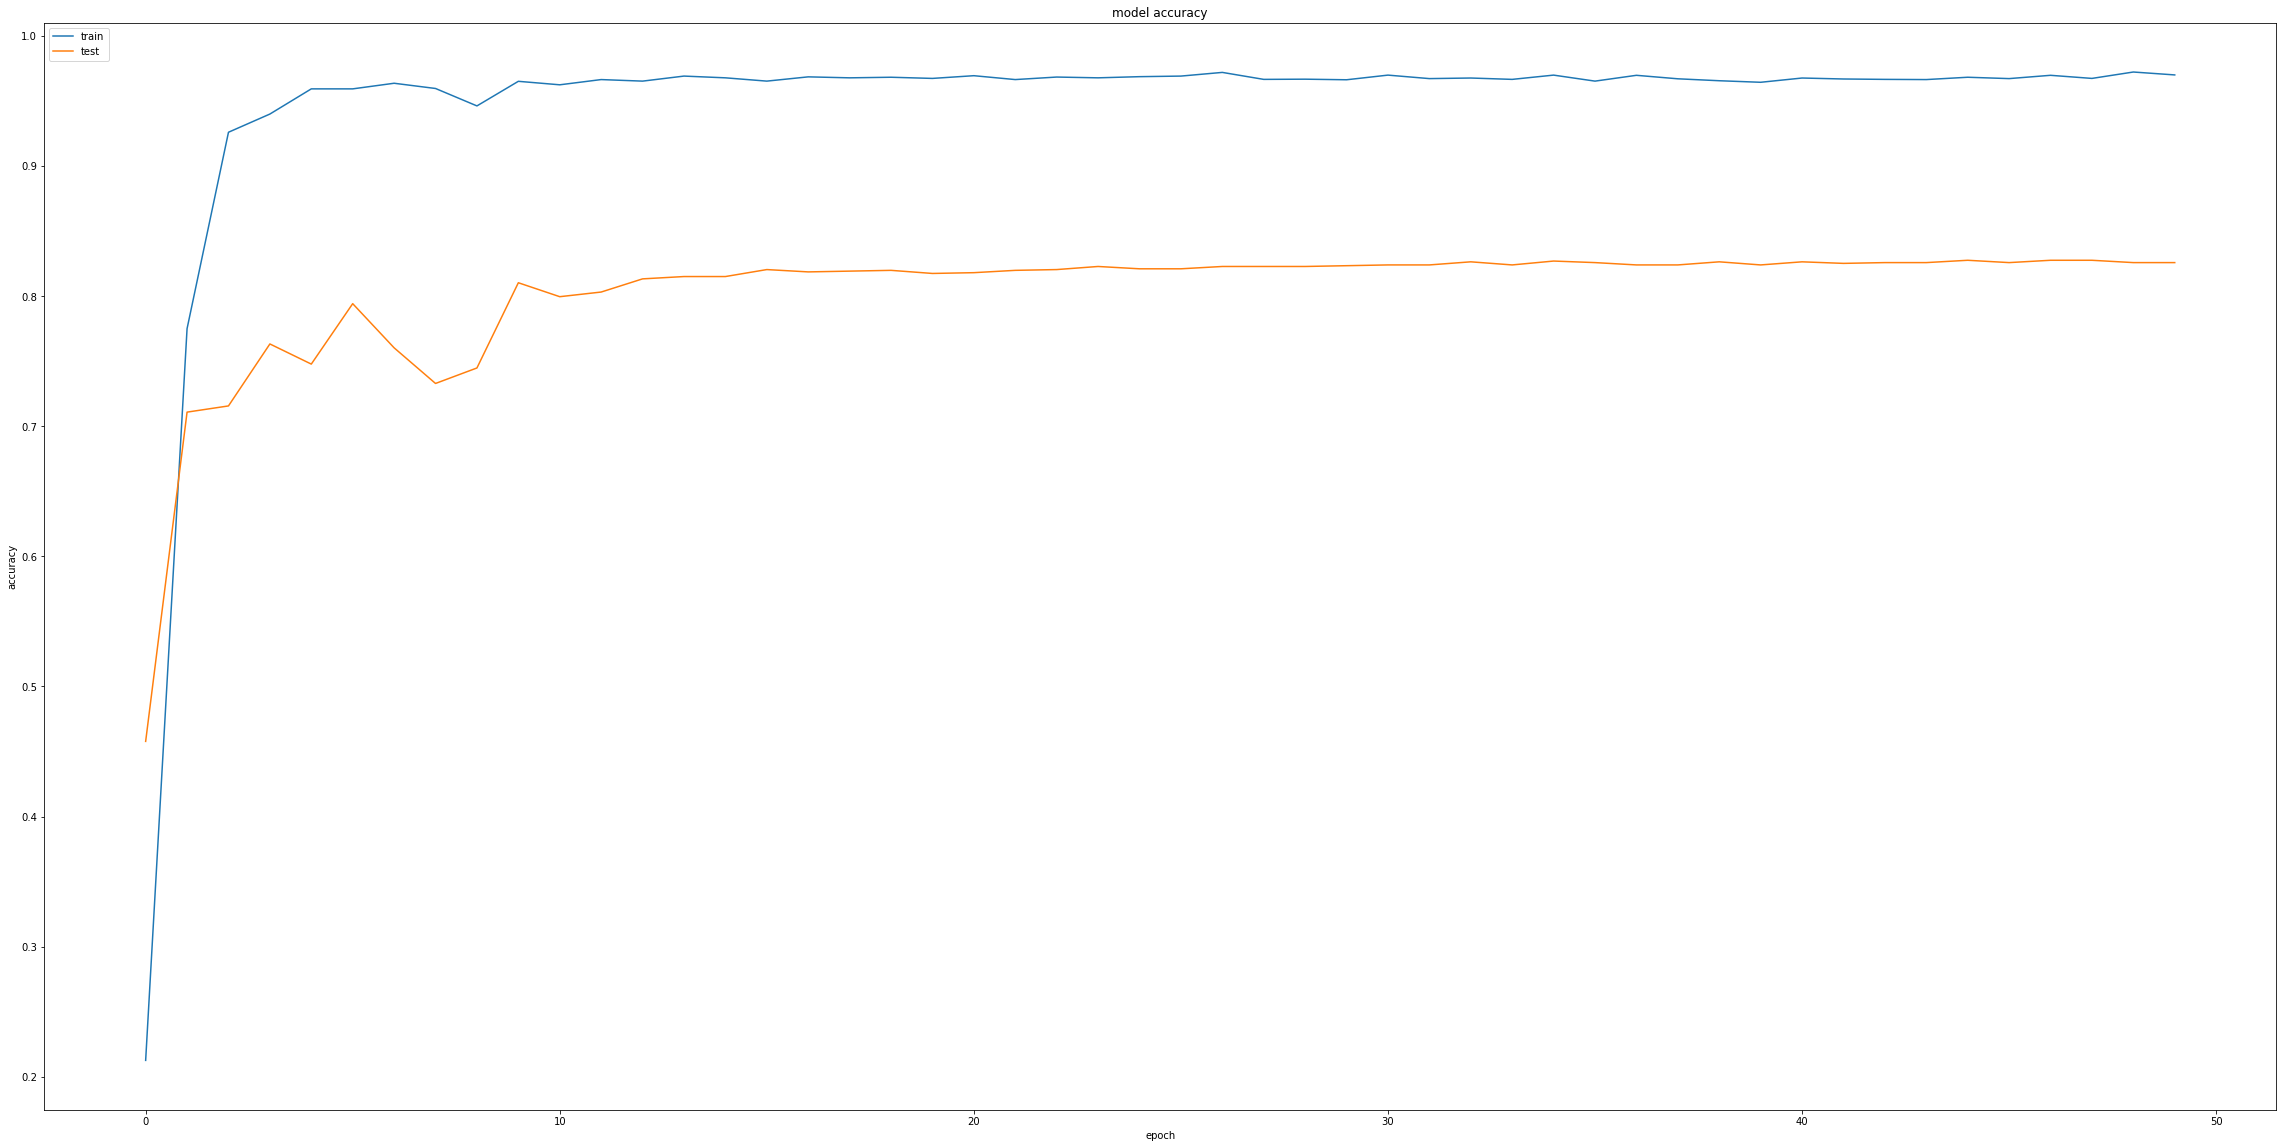

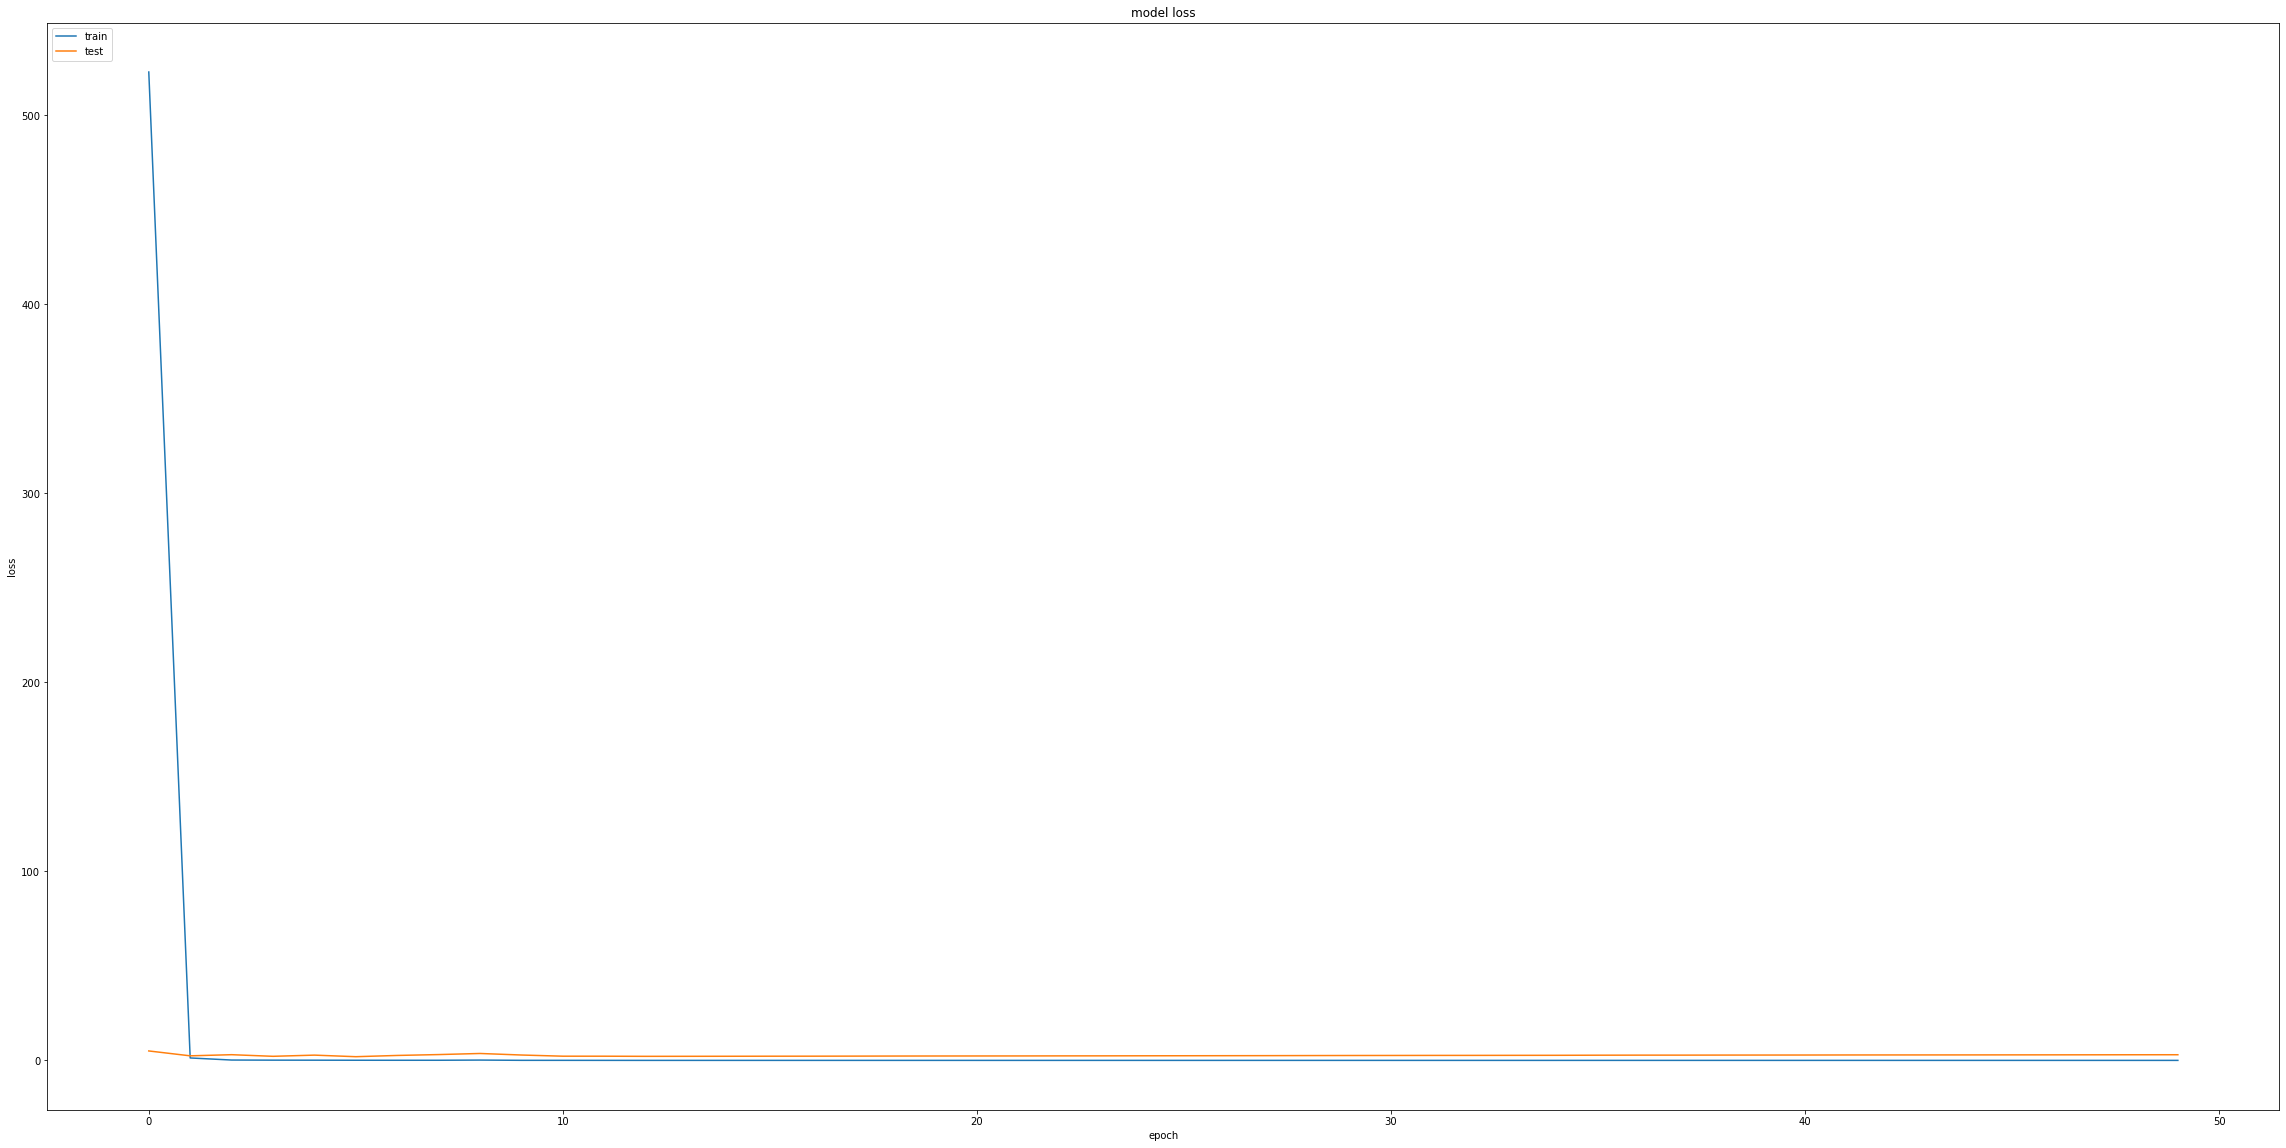

In [39]:
history = model.fit(x=train_x, y=train_y, epochs = 50 , validation_data=(test_x, test_y))

###summarize history for accuracy ###

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###summarize history for loss ###

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

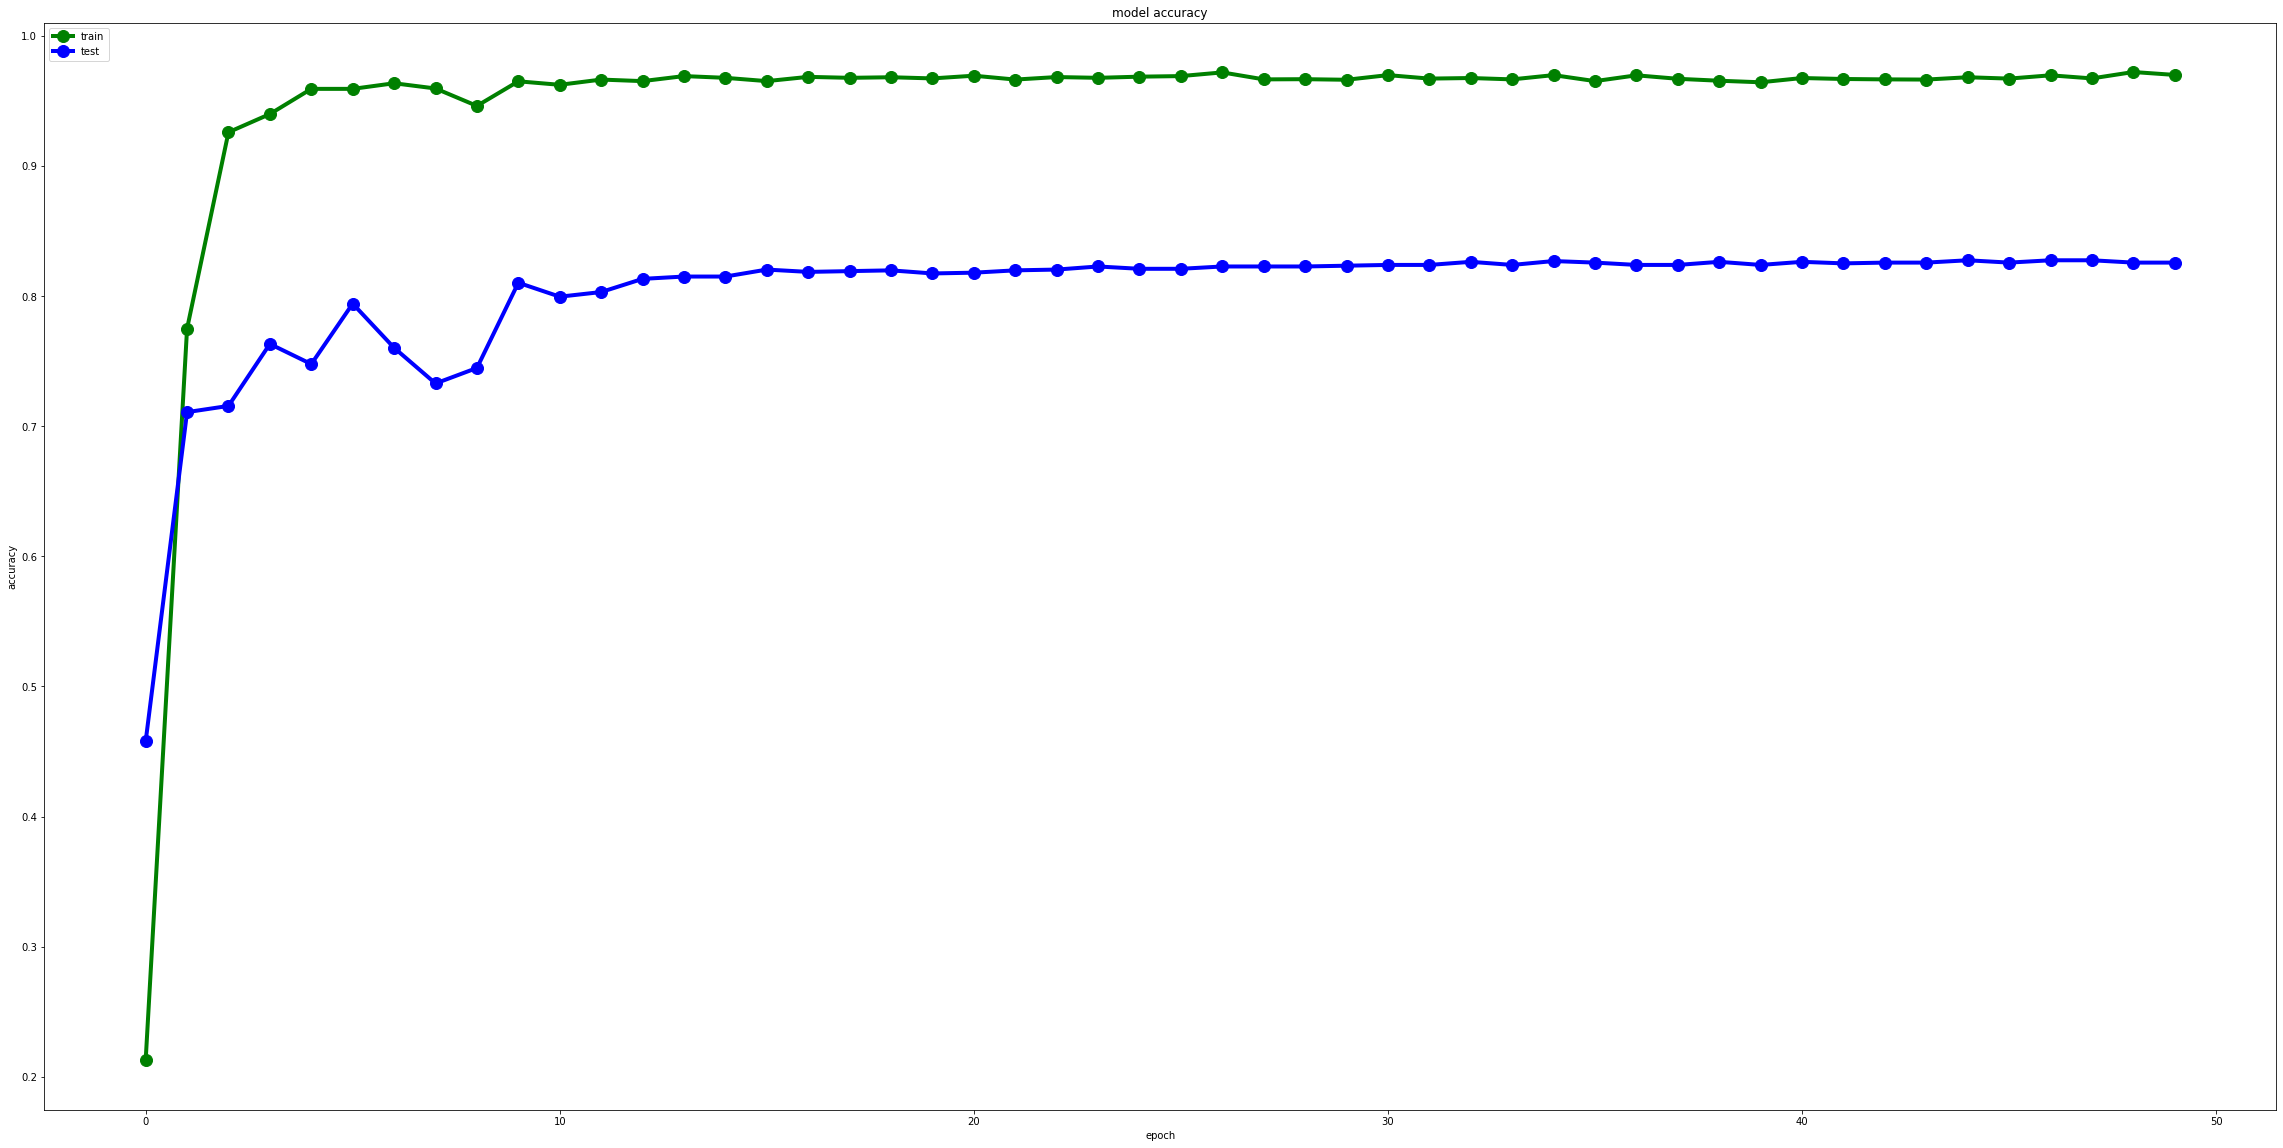

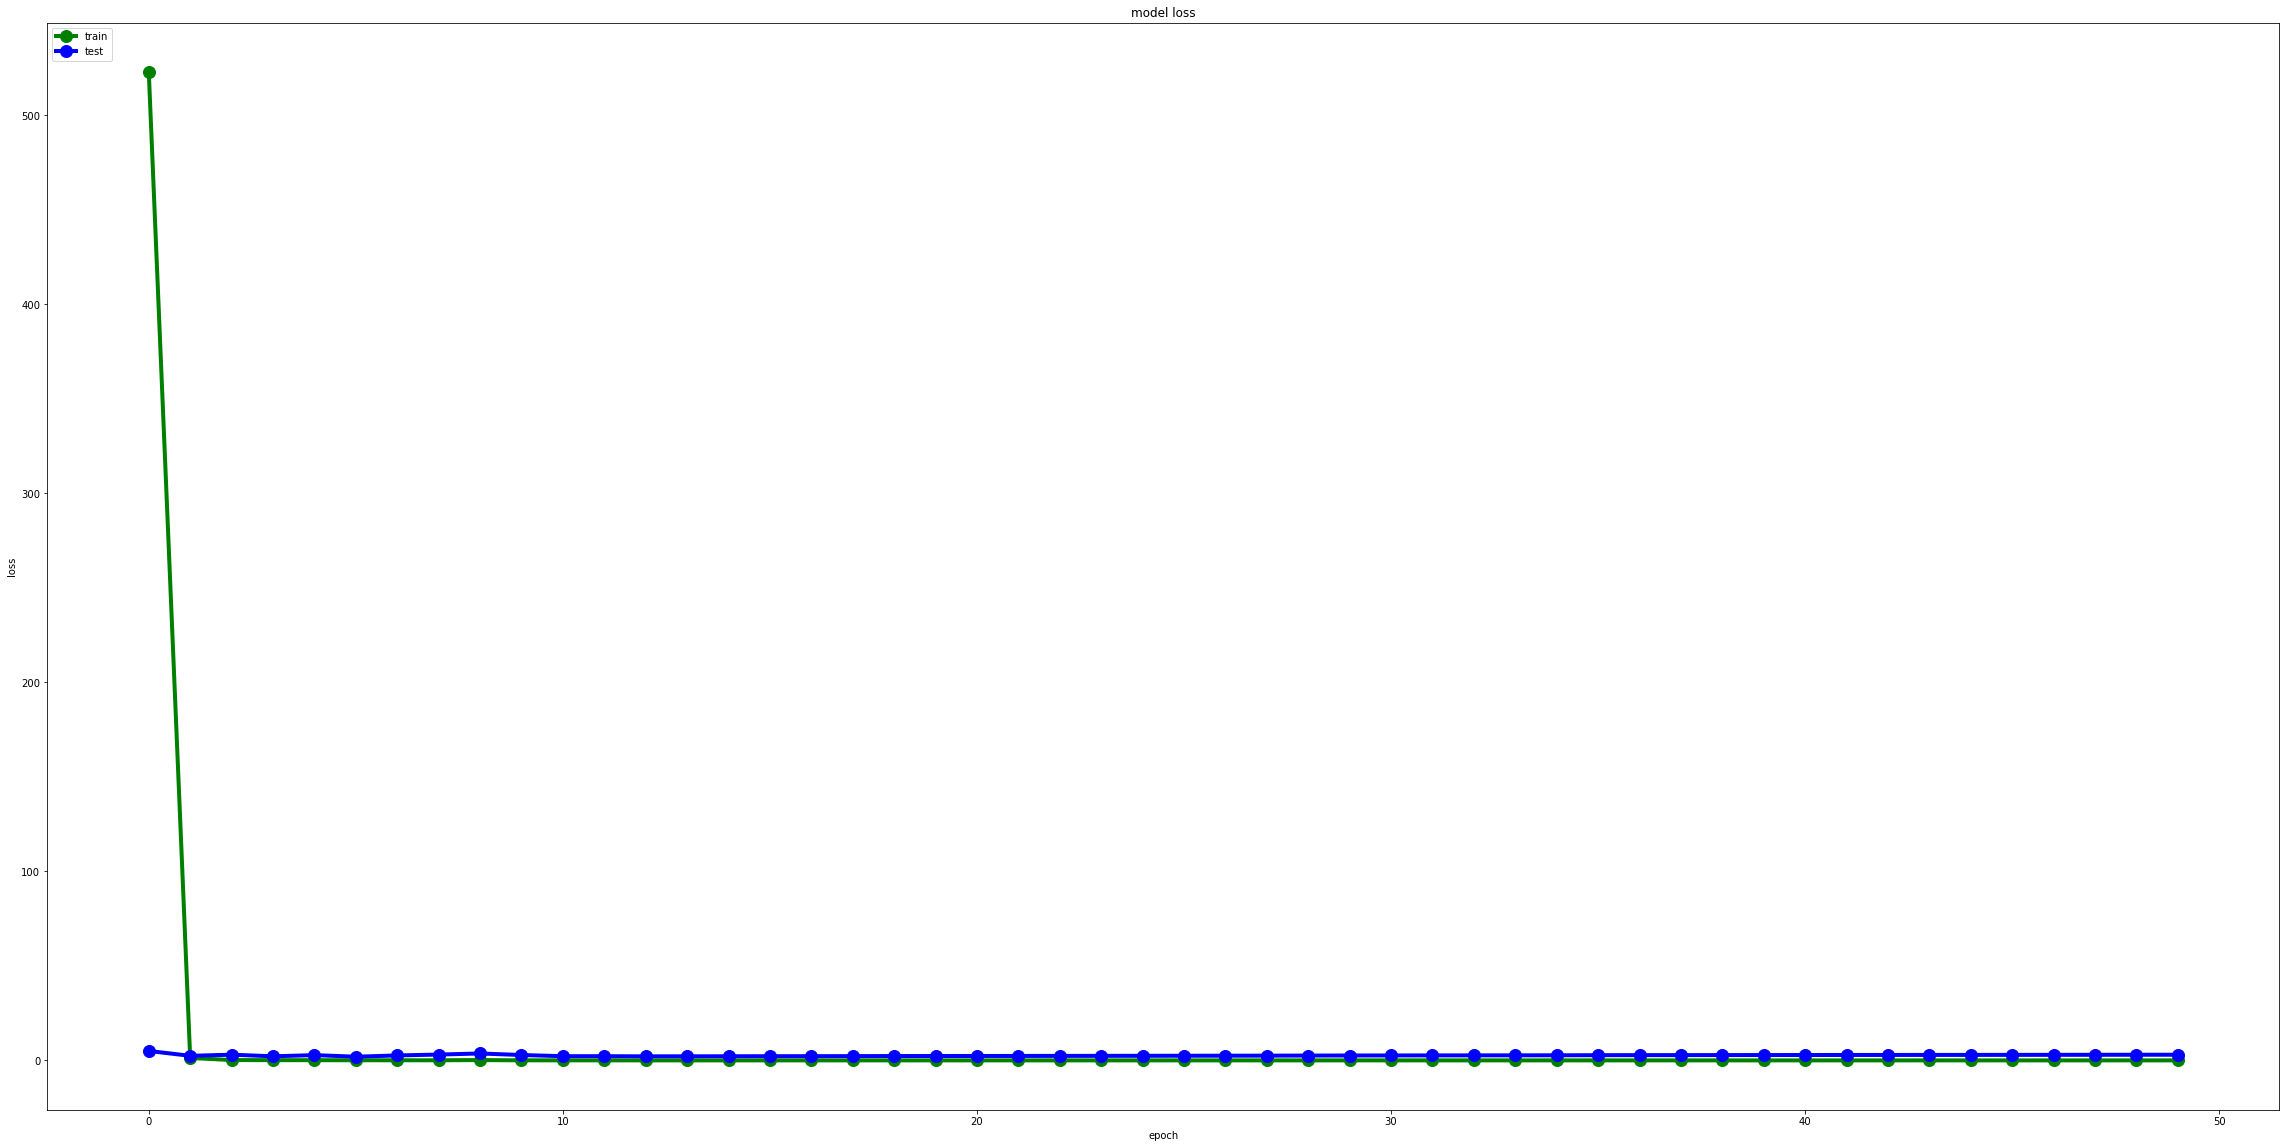

In [43]:
plt.plot(history.history['accuracy'],'-go',linewidth = 4,markersize = 12)
plt.plot(history.history['val_accuracy'],'-bo',linewidth = 4,markersize = 12)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###summarize history for loss ###

plt.plot(history.history['loss'],'-go',linewidth = 4,markersize = 12)
plt.plot(history.history['val_loss'],'-bo',linewidth = 4,markersize = 12)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
data_dir = r"C:\Users\ASUS\OneDrive - BUET\Desktop\SR_DSP\Test Data"

In [45]:
# create training data
def generate_training_data(speaker_paths, speaker, label):
    wavs, labels = [], []
    for i in tqdm(speaker_paths):
        wav = load_wav(i, speaker)
        wavs.append(wav)
        labels.append(label)
    return wavs, labels

In [46]:
id_01_path = get_wav_paths("/ID_01")
id_03_path = get_wav_paths("/ID_03")
id_04_path = get_wav_paths("/ID_04")
id_05_path = get_wav_paths("/ID_05")
id_06_path = get_wav_paths("/ID_06")
id_07_path = get_wav_paths("/ID_07")
id_09_path = get_wav_paths("/ID_09")
id_10_path = get_wav_paths("/ID_10")
id_12_path = get_wav_paths("/ID_12")
id_13_path = get_wav_paths("/ID_13")
id_14_path = get_wav_paths("/ID_14")
id_15_path = get_wav_paths("/ID_15")
id_16_path = get_wav_paths("/ID_16")
id_17_path = get_wav_paths("/ID_17")
id_19_path = get_wav_paths("/ID_19")
id_20_path = get_wav_paths("/ID_20")
id_29_path = get_wav_paths("/ID_29")
id_30_path = get_wav_paths("/ID_30")
id_31_path = get_wav_paths("/ID_31")
id_32_path = get_wav_paths("/ID_32")
id_43_path = get_wav_paths("/ID_43")
id_45_path = get_wav_paths("/ID_45")
id_48_path = get_wav_paths("/ID_48")
id_50_path = get_wav_paths("/ID_50")
id_55_path = get_wav_paths("/ID_55")
id_56_path = get_wav_paths("/ID_56")
id_58_path = get_wav_paths("/ID_58")
id_64_path = get_wav_paths("/ID_64")

In [47]:
id_01_wavs, id_01_labels = generate_training_data(id_01_path, "/ID_01",0) 
id_03_wavs, id_03_labels = generate_training_data(id_03_path, "/ID_03",1) 
id_04_wavs, id_04_labels = generate_training_data(id_04_path, "/ID_04",2)
id_05_wavs, id_05_labels = generate_training_data(id_05_path, "/ID_05",3)
id_06_wavs, id_06_labels = generate_training_data(id_06_path, "/ID_06",4)
id_07_wavs, id_07_labels = generate_training_data(id_07_path, "/ID_07",5)
id_09_wavs, id_09_labels = generate_training_data(id_09_path, "/ID_09",6)
id_10_wavs, id_10_labels = generate_training_data(id_10_path, "/ID_10",7)
id_12_wavs, id_12_labels = generate_training_data(id_12_path, "/ID_12",8)
id_13_wavs, id_13_labels = generate_training_data(id_13_path, "/ID_13",9)
id_14_wavs, id_14_labels = generate_training_data(id_14_path, "/ID_14",10)
id_15_wavs, id_15_labels = generate_training_data(id_15_path, "/ID_15",11)
id_16_wavs, id_16_labels = generate_training_data(id_16_path, "/ID_16",12)
id_17_wavs, id_17_labels = generate_training_data(id_17_path, "/ID_17",13)
id_19_wavs, id_19_labels = generate_training_data(id_19_path, "/ID_19",14)
id_20_wavs, id_20_labels = generate_training_data(id_20_path, "/ID_20",15)
id_29_wavs, id_29_labels = generate_training_data(id_29_path, "/ID_29",16)
id_30_wavs, id_30_labels = generate_training_data(id_30_path, "/ID_30",17)
id_31_wavs, id_31_labels = generate_training_data(id_31_path, "/ID_31",18)
id_32_wavs, id_32_labels = generate_training_data(id_32_path, "/ID_32",19)
id_43_wavs, id_43_labels = generate_training_data(id_43_path, "/ID_43",20)
id_45_wavs, id_45_labels = generate_training_data(id_45_path, "/ID_45",21)
id_48_wavs, id_48_labels = generate_training_data(id_48_path, "/ID_48",22)
id_50_wavs, id_50_labels = generate_training_data(id_50_path, "/ID_50",23)
id_55_wavs, id_55_labels = generate_training_data(id_55_path, "/ID_55",24)
id_56_wavs, id_56_labels = generate_training_data(id_56_path, "/ID_56",25)
id_58_wavs, id_58_labels = generate_training_data(id_58_path, "/ID_58",26)
id_64_wavs, id_64_labels = generate_training_data(id_64_path, "/ID_64",27)

100%|██████████| 20/20 [00:00<00:00, 123.59it/s]


In [48]:
print(type(id_16_wavs))
print(np.array(id_16_wavs).shape)

print(type(id_16_labels))
print(np.array(id_16_labels).shape)

<class 'list'>
(20, 1, 132300)
<class 'list'>
(20,)


In [49]:
all_wavs = id_01_wavs + id_03_wavs + id_04_wavs + id_05_wavs + id_06_wavs + id_07_wavs + id_09_wavs + id_10_wavs + id_12_wavs + id_13_wavs + id_14_wavs + id_15_wavs + id_16_wavs + id_17_wavs + id_19_wavs + id_20_wavs + id_29_wavs + id_30_wavs + id_31_wavs + id_32_wavs  + id_43_wavs + id_45_wavs + id_48_wavs+ id_50_wavs+ id_55_wavs+ id_56_wavs+ id_58_wavs+ id_64_wavs

all_labels = id_01_labels + id_03_labels + id_04_labels + id_05_labels + id_06_labels + id_07_labels + id_09_labels + id_10_labels + id_12_labels + id_13_labels + id_14_labels + id_15_labels + id_16_labels + id_17_labels + id_19_labels + id_20_labels + id_29_labels  + id_30_labels + id_31_labels + id_32_labels  + id_43_labels + id_45_labels + id_48_labels+ id_50_labels+ id_55_labels+ id_56_labels+ id_58_labels+ id_64_labels

In [50]:
print(type(all_wavs))
print(np.array(all_wavs).shape)

print(type(all_labels))
print(np.array(all_labels).shape)
print(all_labels[70:90])

<class 'list'>
(560, 1, 132300)
<class 'list'>
(560,)
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [55]:
###..... Test set initialization......###
test_wavs,test_labels = all_wavs, all_labels

test_x, test_y = np.array(test_wavs), np.array(test_labels)

test_y = tf.keras.utils.to_categorical(test_y)

print(test_x.shape)


(560, 1, 132300)


[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  1 17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   1  0  0  0]
 [ 0  0  0  0 16  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  6  1 10  0  1  0  0  0  0  0  0  0  0  1  0  0  1
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  1  0  0  0  0  0  1  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  1  

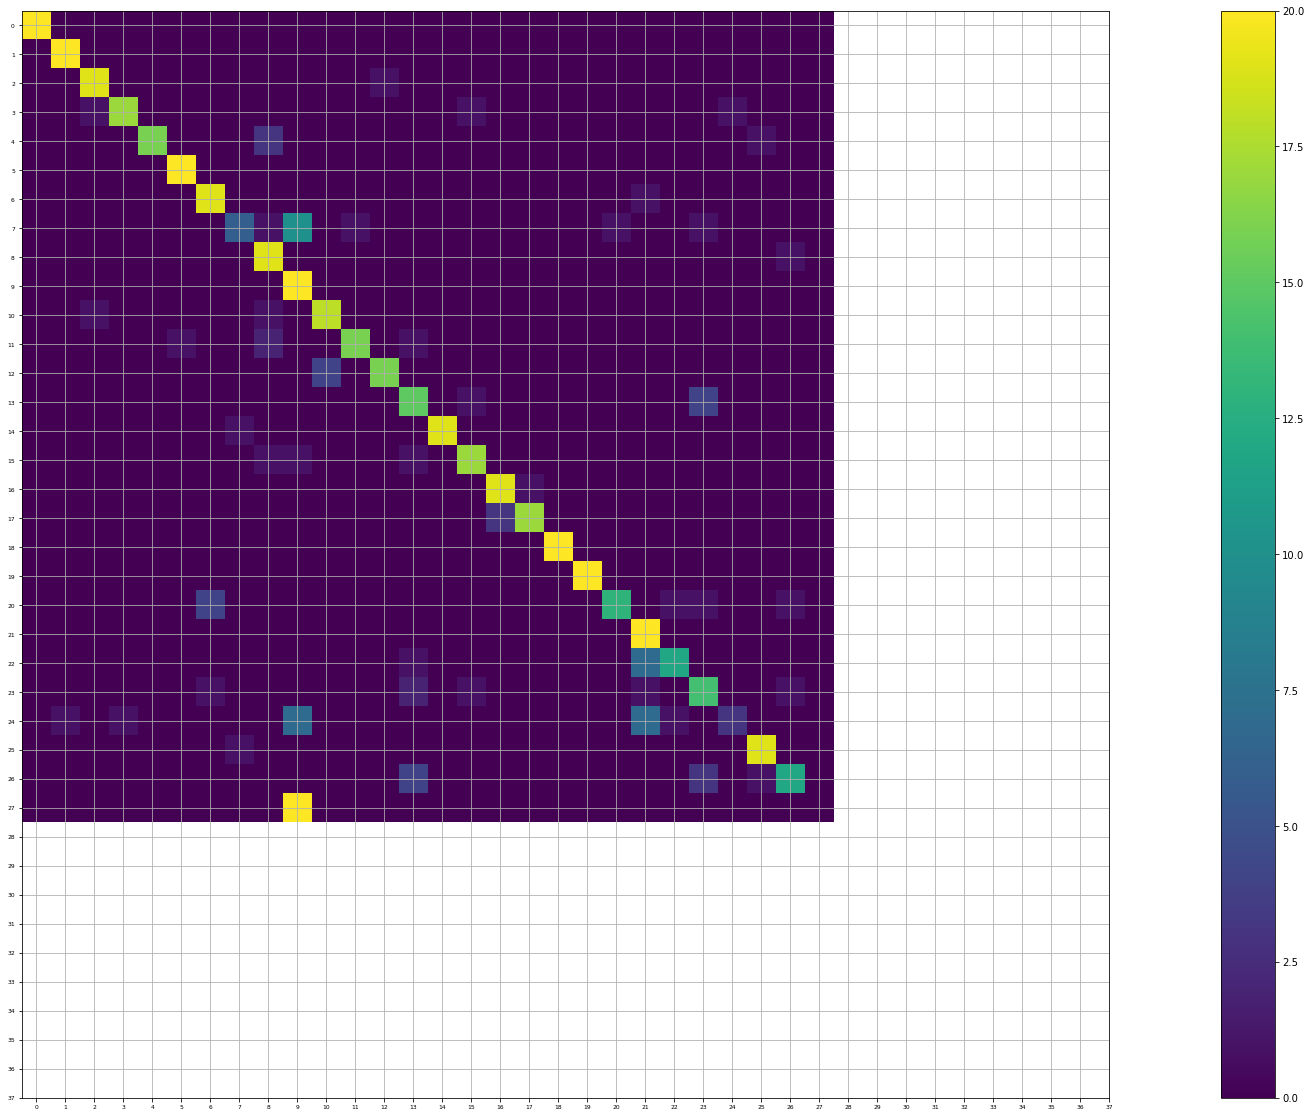

In [52]:
 ### Confusion Matrix Plot###
predictions = model.predict(test_x)
matrix = metrics.confusion_matrix(test_y.argmax(axis=1), predictions.argmax(axis=1))
print(matrix)
plt.rcParams["figure.figsize"] = (40,20)
plt.imshow(matrix)
plt.colorbar()
ticks=np.linspace(0, 37,num=38)
plt.xticks(ticks,fontsize=6)
plt.yticks(ticks,fontsize=6)
plt.grid(True)
plt.show()

In [53]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(test_y.argmax(axis=1), predictions.argmax(axis=1))
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y.argmax(axis=1), predictions.argmax(axis=1),average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y.argmax(axis=1), predictions.argmax(axis=1),average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y.argmax(axis=1), predictions.argmax(axis=1),average='macro')
print('F1 score: %f' % f1)


Accuracy: 0.796429
Precision: 0.811875
Recall: 0.796429
F1 score: 0.780941


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
model.save("model_spectrogram.h5")
print("Saved model to disk")

Saved model to disk
